Status: ✅ done 

## Exercise 23

---

Welcome to the last exercise! In this exercise, we will focus on the following two clustering methods:
- `k-nearest neighbors`
- `hierarchical clustering`

Therefore after this exercise session, you should be able to:
- explain what is clustering
- how do the above methods works and what their pros and cons
- how we can use clustering as part of the machine learning pipeline

> Imports

In [31]:
import math

import numpy as np
from numpy import linalg as LA
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import euclidean

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid");

from sklearn import datasets
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

> Recap

To recap on the lecture about clustering, you can read my [note](https://ludekcizinsky.notion.site/Clustering-methods-08c176c3db95434db54415159ce903d6) on the subject. Below, I will assume that you have basic knowledge about the clustering methods.

### 🏷 Clustering methods theory

---

> Intro to the problem

We are given the following dataset:

![Given dataset](img1.png)

In the subsequent subsections we will apply both `k-means` as well as `hierarchical` algorithms onto this dataset. This should help you practice both approaches.

> K-means algorithm

Recall that `K-means` algorithm works as follows:

1. Start with creating $K$ randomly generated vectors of size $m$ where $m$ is the number of features. We call these vectors centroids.
2. For each observation:
    1. Compute its distance to each of the centroids
    2. Assign it to the closest centroid
3. Recompute the centroids based on its assigned values. Usually a mean is used.

If we choose $K = 2$, then the first step would look as follows:

![KNN example](img2.jpg)

Note that since the algorithm depends on the initil clusters, we should run this whole procedure several times and then take average of the obtained clusters.

> Hierarchical clustering

Hierarchical clustering can be done in two ways: 
- `bottom-up`: start with each observation as being in its own cluster and then at each iteration **merge** two least disimilar clusters. We will practice this in this exercise.
- `top-down`: start with all observations being in a single cluster and then at each iteration find a pair of the most disimilar clusters that you then split. The problem with this approach is that you also need to go over all possible splits which is not the problem in the bottom-up approach where you already know the clusters and just need to compute the disimilarity metric across them.

The advantage of hierarchical compare to `knn` is that we do not have to predefine number of clusters, instead we actually obtain a tree (dendogram) which shows us how the dataset can be clustered into 1 to $n$ clusters.

Let's now focus on the bottom-up algorithm. I mentioned that we need some disimilarity metric, for this problem, we choose it to be `Euclidean distance`. In general the algorithm works as follows:

1. For each pair of samples such that $x_i \in C_k$ and $x_i' \in C_{k'}$, compute a disimilarity measure $D$ and save it to the list of values
2. Use some aggregation function $A$ which takes as an input the list from step 1 and outputs a single number.

As an aggregation function, we will try to use `single` (min) and `complete` linkage (max).

**Single linkage (computes minimum of all the disimilarity values)**

- Merge 1: y = 1.1
    - (2, 6)
- Merge 2: y = 1.4
    - (3, 5)
- Merge 3: y = 1.8
    - (3, 5, 4)
- Merge 4: y = 2.5
    - (2, 6, 1)
- Merge 5: y = 3.2
    - (2, 6, 1, 3, 5, 4)
- Merge 6: y = 6.4
    - (2, 6, 1, 3, 5, 4, 7)

**Complete linkage (computes maximum of all the disimilarity values)**
- Merge 1: y = 1.1
    - (2, 6)
- Merge 2: y = 1.4
    - (3, 5)
- Merge 3: y = 2.1
    - (3, 4, 5)
- Merge 4: y = 3.6
    - (1, 2, 6)
- Merge 5: y = 8.2
    - (3, 4, 5, 7)
- Merge 6: y = 9.2
    - (1, 2, 3, 4, 5, 6, 7) 

**Visualization (dendogram)**

![dendogram](img3.jpg)

We can see that if we would make cut at $y=2$ in for instance the single linkage dendogram, then we would obtain four clusters: (1), (2, 6), (3, 4, 5), (7). In addition, from the single linkage we can see that as we progress towards the top, the more disimillar the clusters we merge are, it is the other way around for the complete linkage.

> Section summary

After going through this section, you should be able to:
- explain how `KNN` works
- explain how `bottom-up` clustering works as well as how to interpret the result (dendogram) 

### 🏷 Experimenting with KNN using sklearn

---

> Intro to the section

In this section, we will explore the relation between number of clusters $K$ and corresponding within-cluster deviance. For this we will use the `iris-dataset` and its two features `petal width` and `petal length`:

In [2]:
X = datasets.load_iris().data[:, [0, 1]]
y = datasets.load_iris().target

> Number of clusters and within-cluster deviance 

First, we train `KNN` models with all possible number of $K$s:

In [10]:
models = [KMeans(i + 1, random_state = 42).fit(X) for i in range(117)] # Only 117 unique points

Second, we visualize the relationship of the two before mentioned variables:

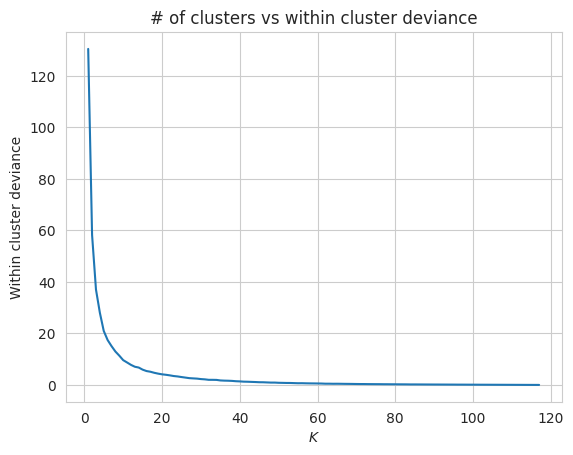

In [13]:
# Define x and y values
Ks = [i + 1 for i in range(117)]
deviance = [model.inertia_ for model in models]

# Define figure
fig, ax = plt.subplots()

# Show the plot
sns.lineplot(x=Ks, y=deviance, ax=ax);
ax.set_xlabel("$K$");
ax.set_ylabel("Within cluster deviance");
ax.set_title("# of clusters vs within cluster deviance");

Clearly, as we increase the number of clusters, the within cluster deviance decreases. For the special case where number of clusters is equal to the number of unique points, the within cluster deviance is zero since the distance to center is zero, and if you square and sum all these distances, you will obtain zero.

Now, if we were to choose the optimal number of clusters, we want to find right balance between within cluster deviance (ideally low) and number of clusters (usually depends on the context of problem). In this case, we know that there are in total three flower classes, therefore, we might want to choose 3 to see if the algorithm is actually able to capture these groups:

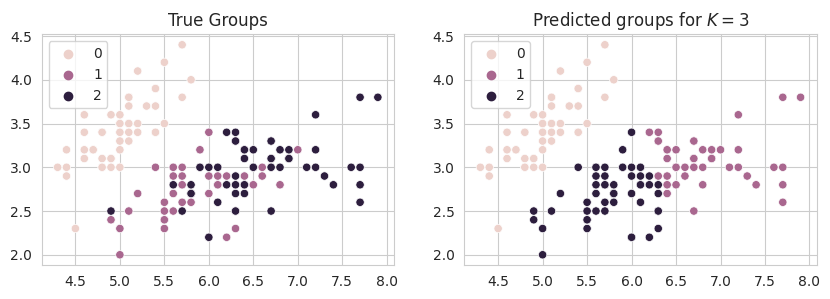

In [21]:
# Define figure
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Show true groups
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=axs[0]);
axs[0].set_title("True Groups");

# Show predicted groups
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=models[2].labels_, ax=axs[1]);
axs[1].set_title("Predicted groups for $K = 3$");

We can see that group $0$ is perfect, since the other two groups are quite intermixed, it is hard for the `KNN` to discriminate them. For this reason, we might want to increase the cluster number.

> Section summary

In this section, the goal was to explore the relationship between within cluster deviance and number of clusters. As you might expect, the more clusters we have the smaller is the within cluster deviance. We also discussed the choice of optimal number of clusters which depepnds not only on minimizing the within cluster deviance but also the context of the problem - ideally we want the clusters to have some meaning. On the other hand, sometimes we want our algorithm to actually tell us what are the related groups in our dataset.

### 🏷 Experimenting with Single-linkage clustering using sklearn

---

> Intro to the section

In this section, we will explore how to cluster the iris dataset using bottom-up hierarchical approach with aggregration being single linkage.

> Getting the dendogram

We start with the helper function for plotting dendogram:

In [23]:
def plot_dendrogram(model, **kwargs):
    """Create linkage matrix and then plot the dendrogram
    """

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Let's try it out:

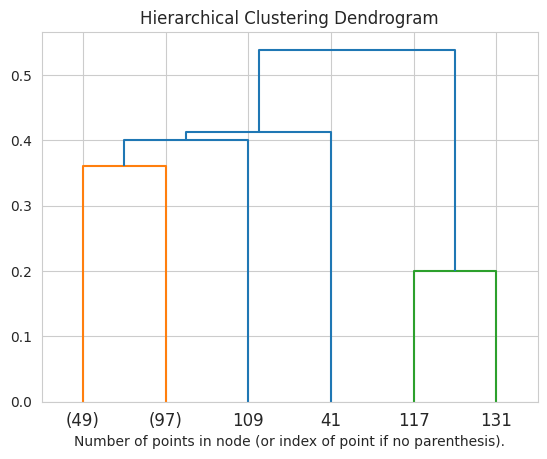

In [25]:
# Note: setting distance_threshold = 0 ensures we compute the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')

# Train the model
model = model.fit(X)

# Plot the top three levels of the dendrogram
plt.title("Hierarchical Clustering Dendrogram");
plot_dendrogram(model, truncate_mode="level", p=3);
plt.xlabel("Number of points in node (or index of point if no parenthesis).");

Now, let's explore how the algorithm clusters the points if we set $K = 3$:

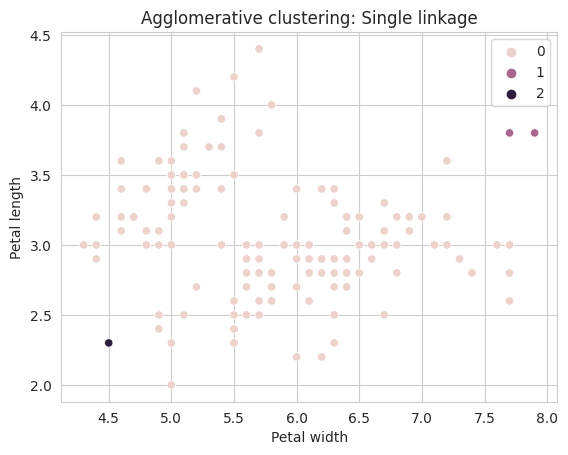

In [30]:
# Define figure
fig, ax = plt.subplots()

# Get the predicted labels
clusters = AgglomerativeClustering(n_clusters=3,linkage='single').fit_predict(X)

# Show the clusters
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters);
ax.set_xlabel("Petal width");
ax.set_ylabel("Petal length");
ax.set_title("Agglomerative clustering: Single linkage");

Clearly, works worse than `KNN`... The problem might be in that we are using `single linkage` to aggregate the disimilarities accross individual points accross the given two clusters. Since single linkage takes the minimum, perhaps mean would be more suitable.

> Section summary

This section was about exploring how to do hierarchical clustering using `sklearn`. We also got to compare how well single linkage hierarchical clustering works for the iris dataset - not so well relative to KNN.

### 🏷 Using K-means to reduce the dataset size

---

> Intro to the section

In this section, we will use `K-means` to reduce the size of the given dataset, i.e., we will group similar points and treat them as a single sample and then train `KNN` classifier on top of this reduced dataset.

> Implementation of the hybrid classifier

The hybrid classifier should:

- aggregate data: perform within each class (3 species) a K-means clustering with 10 clusters
- make prediction: for given sample $x$ choose the nearest prototype (aggregate of several points belonging to given class and cluster)

In [33]:
class HybridClf:
        
    def __init__(self, n_clusters, clustering_algo):
        self.n_clusters = n_clusters
        self.clustering_algo = clustering_algo
        self.X = None
        self.y = None # Assume that labels are sorted and indeed correspond to X
        self.new_labels = None
        self.prototypes = None
        self.centroids = dict()
        
    
    def fit(self, X, y):
        
        # Assign the X and y to the object for later use
        self.X = X
        self.y = y
        
        # Get the new labels based on initial category and then assigned cluster label within that category
        models = [self.clustering_algo(self.n_clusters, random_state=42).fit(self.X[self.y == i]) for i in range(len(set(self.y)))]
        new_labels = []
        for i, model in enumerate(models):
            new_labels.extend([f"CAT{i}CLU{lab}" for lab in model.labels_])
        
        # Save is as np array
        self.new_labels = np.array(new_labels)
        
        # Also update prototypes which are the unique labels
        self.prototypes = list(set(self.new_labels))
        
        # Represent each prototype by its centroid
        for label in self.prototypes:

            # Get relevant points for given label
            relevant_points = self.X[self.new_labels == label]

            # Get centroid by computing a mean along the columns
            centroid = np.mean(relevant_points, axis = 0)
            self.centroids[label] = centroid
    
    
    def predict(self, X):
        
        predicted_labels = []
        for i,row in enumerate(X):

            # Compute distance to each centroid
            distances = [euclidean(row, self.centroids[label]) for label in self.prototypes]

            # Get minimum distance
            min_d = min(distances)

            # Find the closest centroid
            relevant_index = distances.index(min_d)

            # Get predicted label
            predicted_labels.append(self.prototypes[relevant_index])
        
        return np.array(predicted_labels)

> Visualise the decision boundary of the hybrid classifier

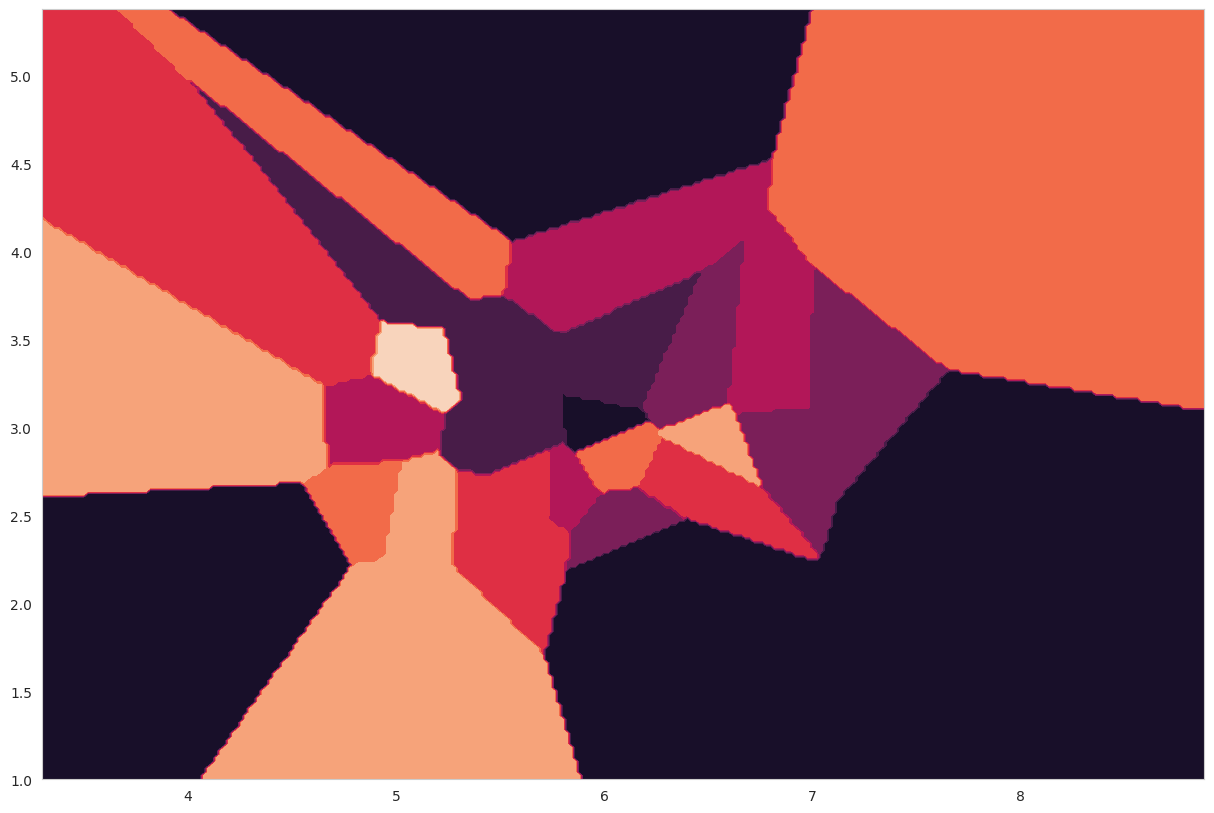

In [34]:
# Define plot
fig, ax = plt.subplots(figsize=(15, 10))

# Fit the classifier
clf = HybridClf(10, KMeans)
clf.fit(X, y)

# step size in the mesh
h = 0.02  

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Compute the prediction
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Map predicted classes represented as numbers to labels
mapping = {prototype: i for i, prototype in enumerate(clf.prototypes)}
Z_remapped = np.array([mapping[z] for z in Z])

# Show the plot
Z_reshaped = Z_remapped.reshape(xx.shape)
ax.contourf(xx, yy, Z_reshaped);

> Section summary

The purpose of this section was to demonstrate how one can combine different models (supervised and unsupervised) together into a single model. In this particular case, our motivation was to reduce the datasets in terms number of samples. With that being said, I believe this is an extra exercise which is fine if you do not get fully. Thanks for the attention throughout the semester and congrats, you made it through! Good luck at the exam!

---

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cee6d685-5921-489d-b896-051c10510ac3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>